In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',100)
from sklearn.linear_model import Log
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,accuracy_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler


from sklearn.model_selection import RandomizedSearchCV

In [2]:
data=pd.read_csv(r"C:\Users\aksha\Downloads\Home-credit\application_train.csv")

In [3]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [5]:
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
# Determine the number of fraud and valid transactions in the dataset
Fraud = data[data['TARGET'] == 1]
Valid = data[data['TARGET'] == 0]

# Calculate the outlier fraction
outlier_fraction = len(Fraud) / float(len(Fraud) + len(Valid))

# Calculate the percentages
total_cases = len(Fraud) + len(Valid)
fraud_percentage = (len(Fraud) / total_cases) * 100
valid_percentage = (len(Valid) / total_cases) * 100

print('Point Of Fraud in the whole dataset:')
print(outlier_fraction)

print("Fraud Cases: {}".format(len(Fraud)))
print("Valid Cases: {}".format(len(Valid)))

print("Percentage of Fraud Cases: {:.2f}%".format(fraud_percentage))
print("Percentage of Valid Cases: {:.2f}%".format(valid_percentage))

Point Of Fraud in the whole dataset:
0.08072881945686496
Fraud Cases: 24825
Valid Cases: 282686
Percentage of Fraud Cases: 8.07%
Percentage of Valid Cases: 91.93%


In [7]:
data.shape

(307511, 122)

In [8]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap(dataframe, figsize=(20, 16), annot_size=5):
    """
    Plot a heatmap of all variables in the dataset.

    Parameters:
    dataframe (pd.DataFrame): The dataset to plot.
    figsize (tuple): The size of the figure. Default is (20, 16).
    annot_size (int): Font size for annotations. Default is 5.
    """
    plt.figure(figsize=figsize)
    sns.set(style='white')

    # Compute the correlation matrix
    corr = dataframe.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
                annot_kws={"size": annot_size})

    plt.title('Heatmap of All Variables in the Dataset', fontsize=20)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

# Example usage with a dataset named application_train
# application_train = pd.read_csv('path_to_dataset.csv')
# plot_heatmap(application_train)


C:\Users\aksha\AppData\Local\Temp\ipykernel_14308\610115386.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


<Figure size 2000x1600 with 0 Axes>

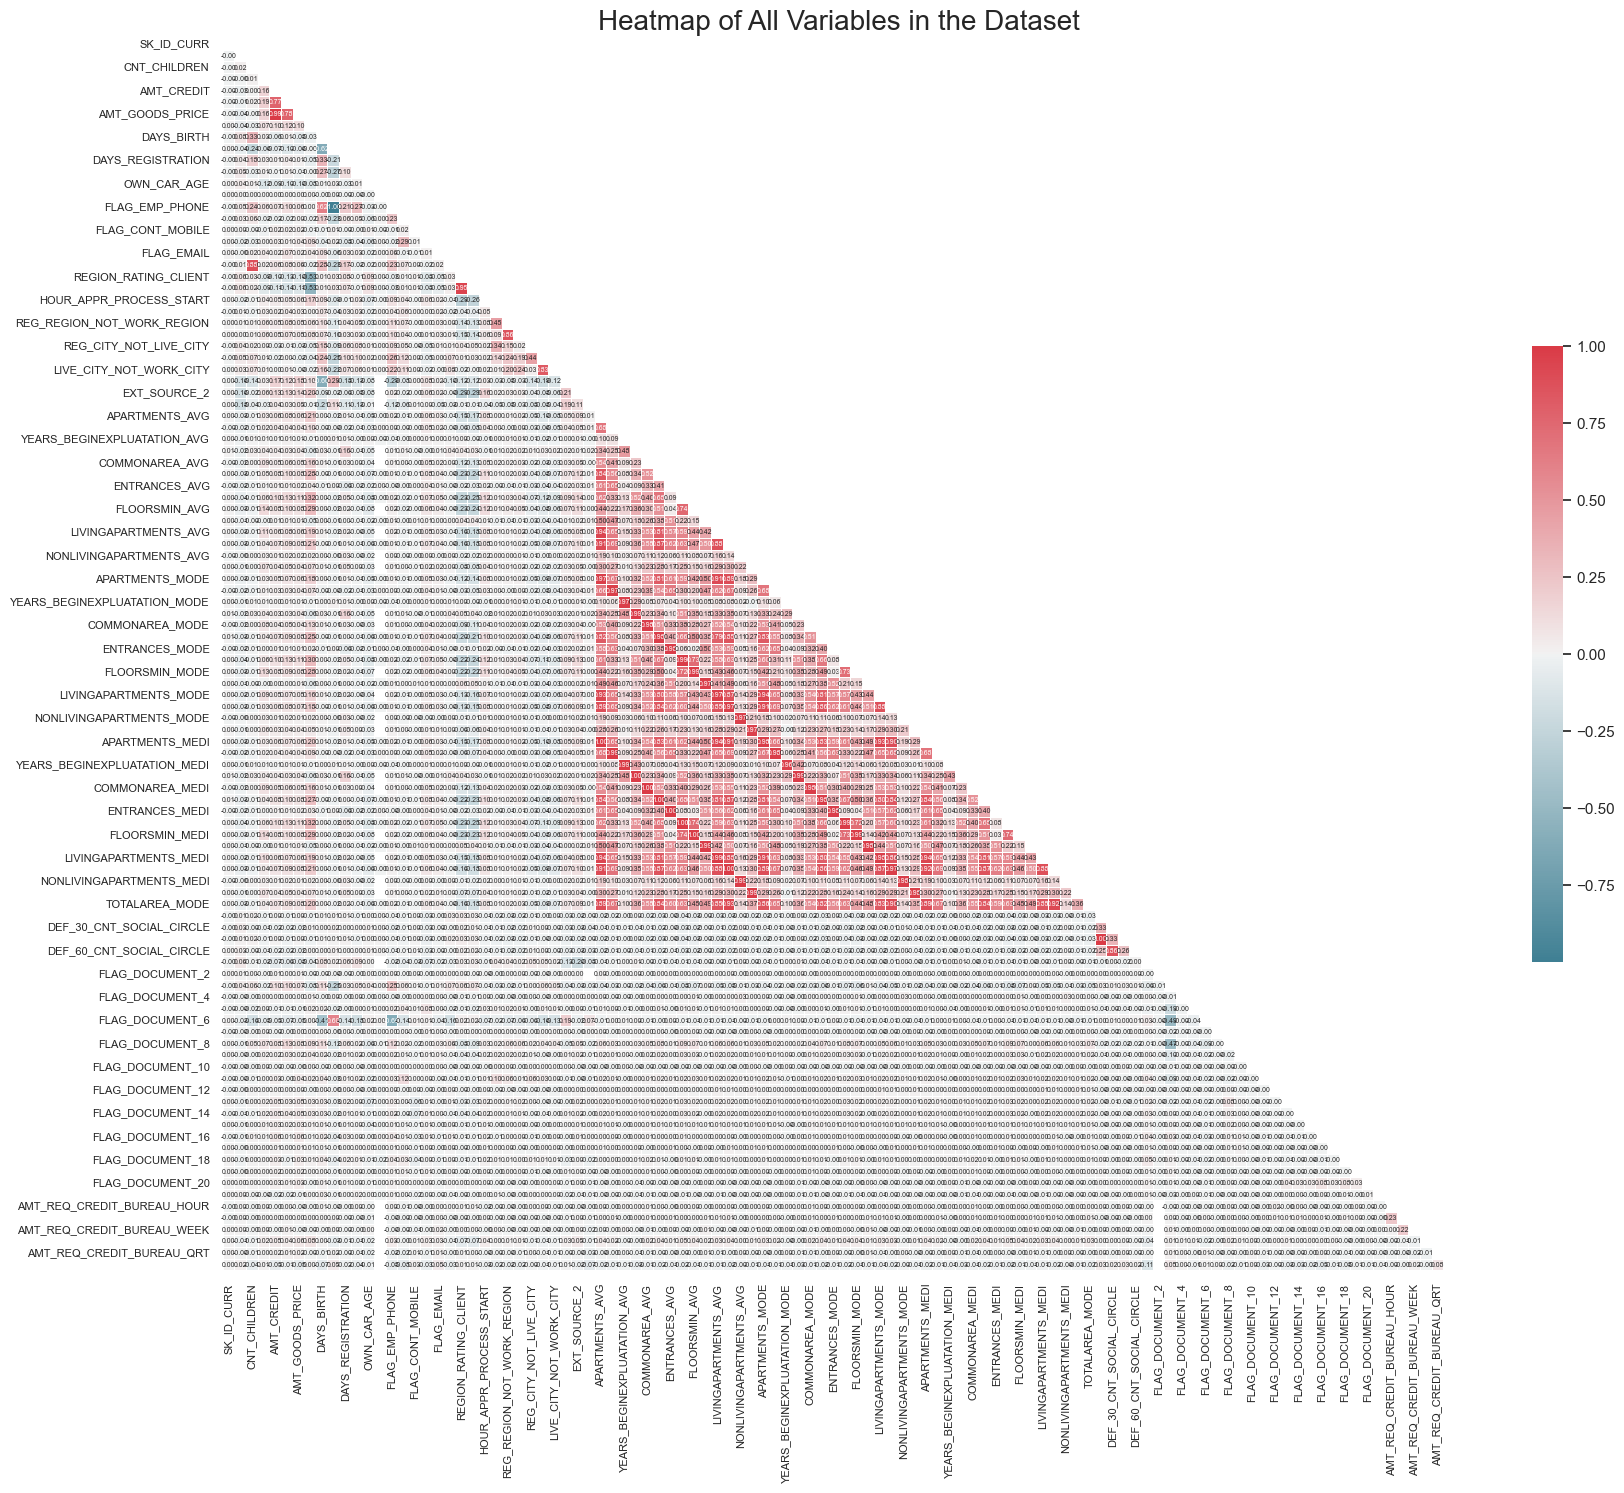

In [12]:
plot_heatmap(data)

In [13]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.155317     -0.160472     -0.178919
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000

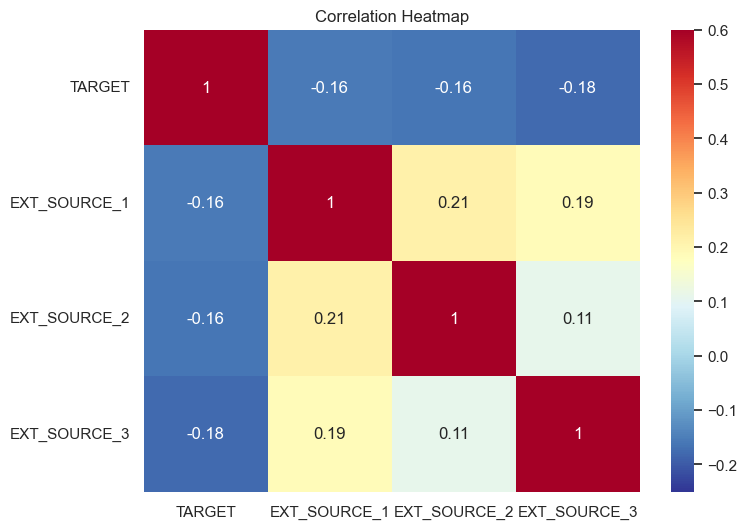

In [14]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

C:\Users\aksha\AppData\Local\Temp\ipykernel_14308\2351389140.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


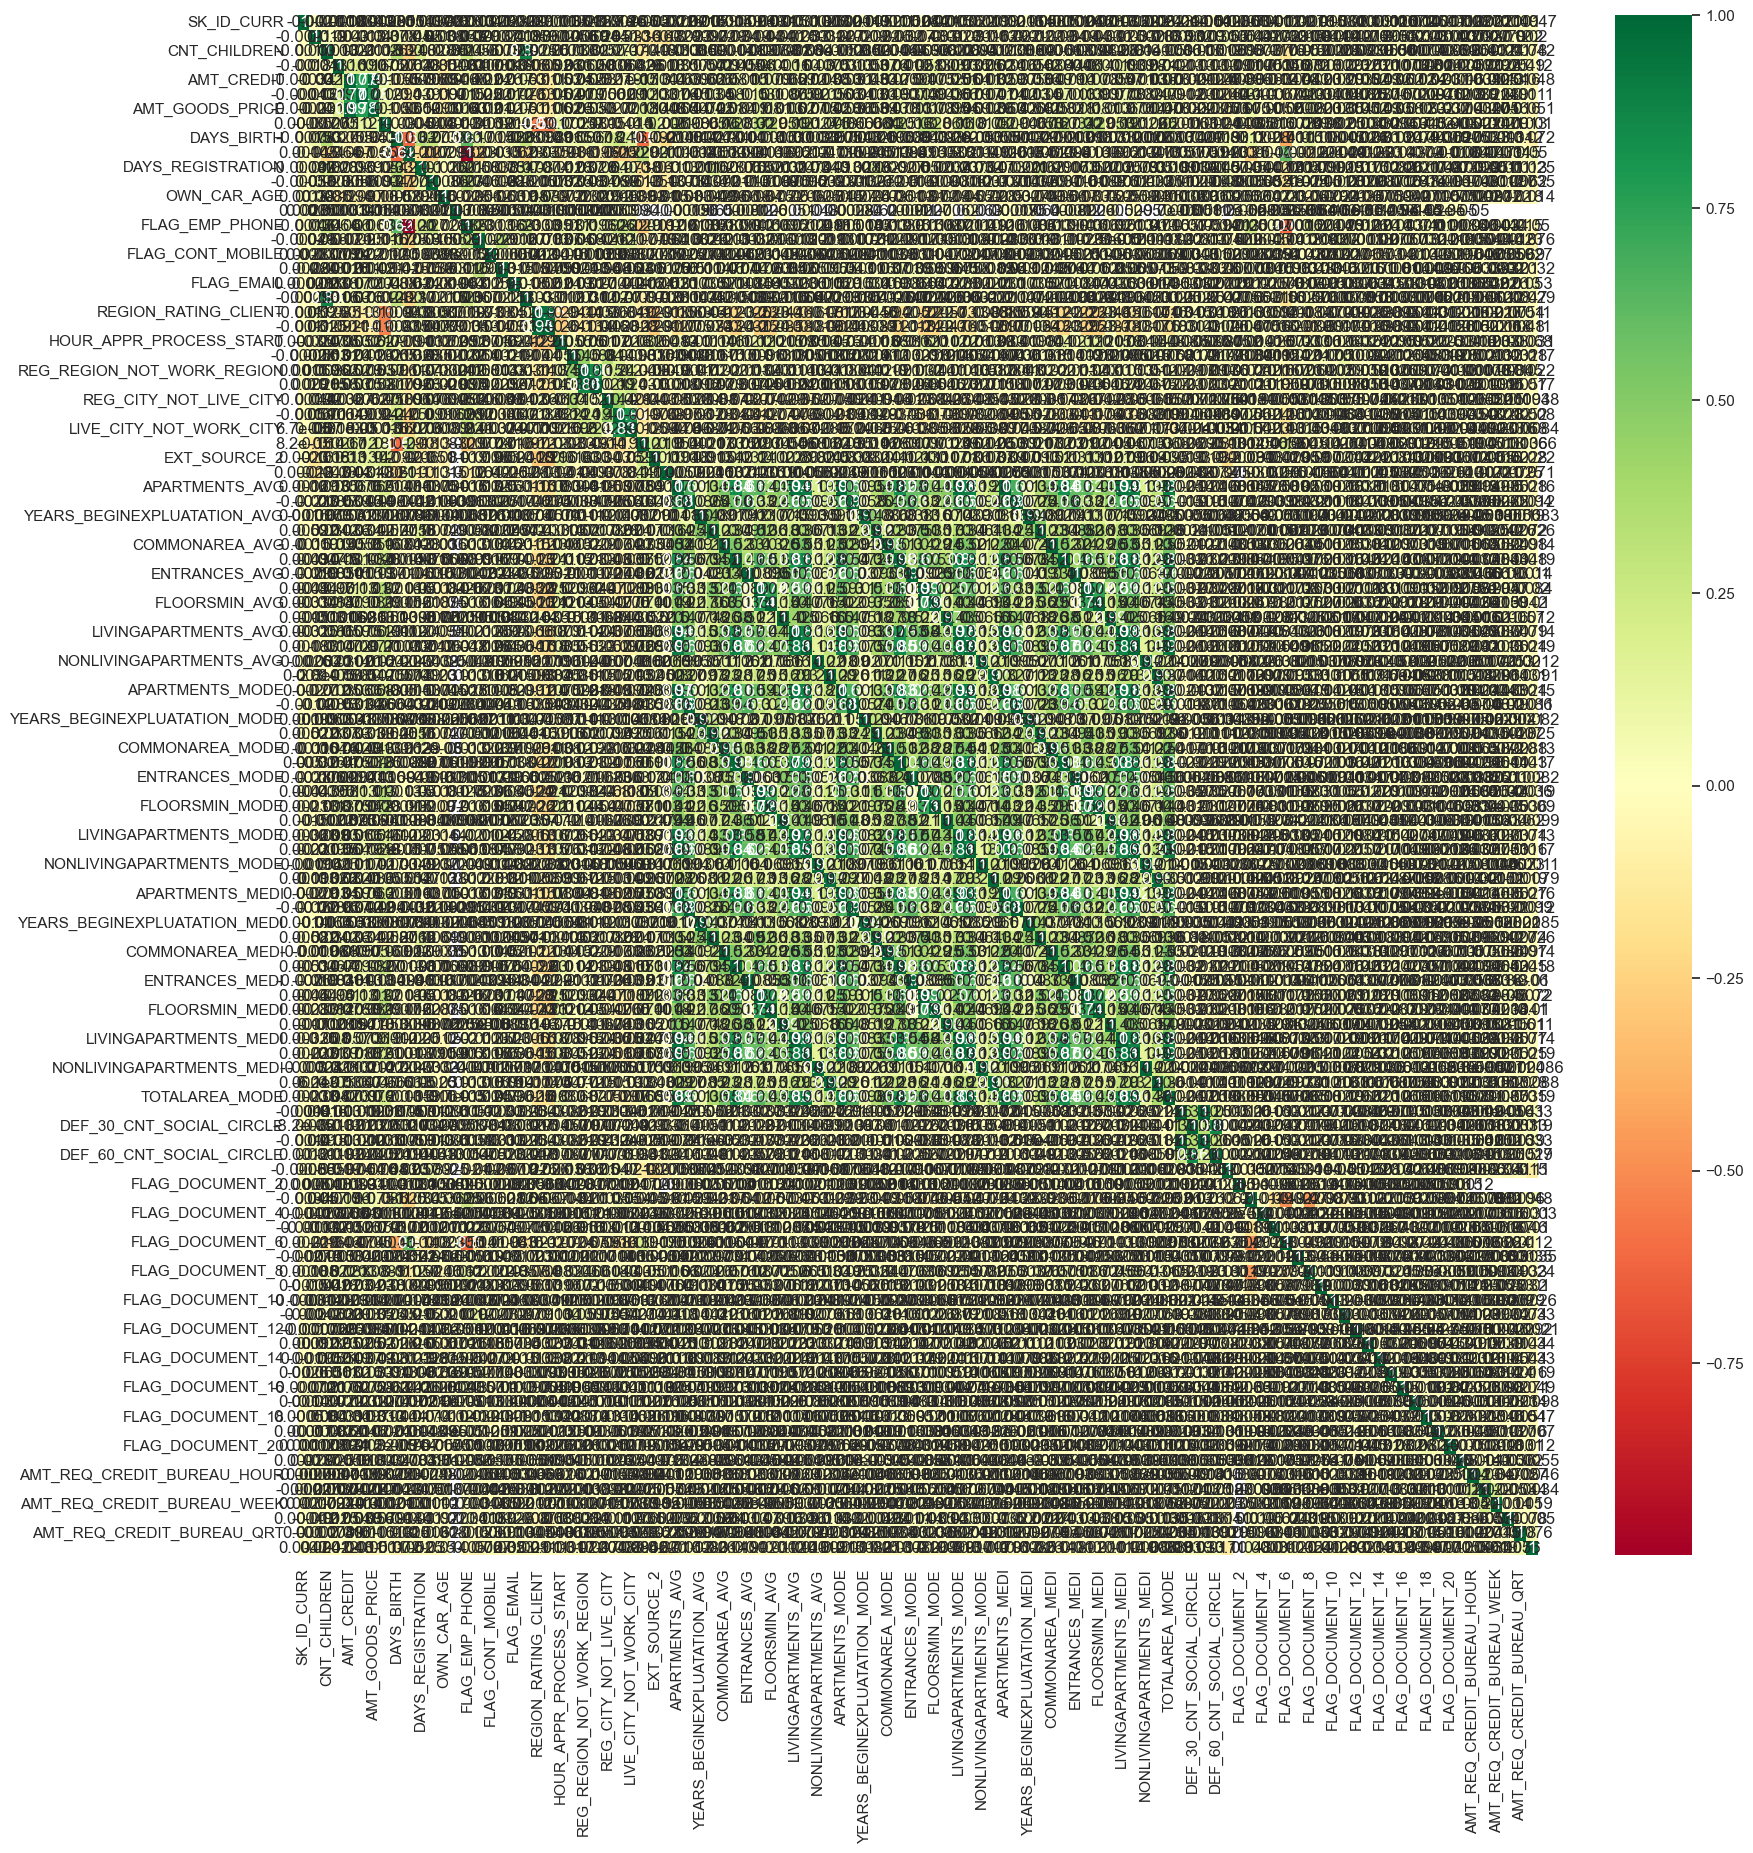

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming corrmat and application_train are defined
corrmat = data.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))
# Plotting the heatmap
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [16]:
import pandas as pd
data = pd.read_csv(r"C:\Users\aksha\Downloads\Home-credit\application_train.csv")
non_numerical_columns = data.select_dtypes(exclude=[np.number])
non_numerical_data = pd.DataFrame(data=non_numerical_columns, columns=non_numerical_columns.columns)
print("Non-Numerical Data:")
print(non_numerical_data.head())
non_numerical_data.to_csv("non_numerical_data.csv", index=False)
nnd=pd.read_csv(r"numerical_data.csv")

Non-Numerical Data:
  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKD

In [17]:
numerical_columns = data.select_dtypes(include=[np.number])
numerical_data = pd.DataFrame(data=numerical_columns, columns=numerical_columns.columns)
print("Numerical Data:")
print(numerical_data.head())
numerical_data.to_csv("numerical_data.csv", index=False)
nd=pd.read_csv(r"numerical_data.csv")

Numerical Data:
   SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637            -3648.0  

In [18]:
import numpy as np
import pandas as pd
correlations = nd.corr()['TARGET'].abs().sort_values(ascending=False)
print('Most Positive Correlations:\n', correlations.head(30))
print('\nMost Negative Correlations:\n', correlations.tail(15))
threshold = correlations.iloc[10]  
print(f'\nThreshold based on top 10 significant correlations: {threshold:.2f}')

Most Positive Correlations:
 TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE     0.037227
ELEVATORS_AVG                  0.034199
ELEVATORS_MEDI                 0.033863
FLOORSMIN_AVG                  0.033614
FLOORSMIN_M

In [19]:
import numpy as np
import pandas as pd
correlations = nnd.corr()['TARGET'].abs().sort_values(ascending=False)
print('Most Positive Correlations:\n', correlations.head(30))
print('\nMost Negative Correlations:\n', correlations.tail(15))
threshold = correlations.iloc[10] 
print(f'\nThreshold based on top 10 significant correlations: {threshold:.2f}')

Most Positive Correlations:
 TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE     0.037227
ELEVATORS_AVG                  0.034199
ELEVATORS_MEDI                 0.033863
FLOORSMIN_AVG                  0.033614
FLOORSMIN_M

In [20]:
train_data=data[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','DAYS_REGISTRATION','AMT_GOODS_PRICE','OWN_CAR_AGE','REGION_POPULATION_RELATIVE','ELEVATORS_AVG','ELEVATORS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MEDI','LIVINGAREA_AVG','LIVINGAREA_MEDI','FLOORSMIN_MODE','TOTALAREA_MODE','LIVE_CITY_NOT_WORK_CITY']]

In [21]:
len(['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','DAYS_REGISTRATION','AMT_GOODS_PRICE','OWN_CAR_AGE','REGION_POPULATION_RELATIVE','ELEVATORS_AVG','ELEVATORS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MEDI','LIVINGAREA_AVG','LIVINGAREA_MEDI','FLOORSMIN_MODE','TOTALAREA_MODE','LIVE_CITY_NOT_WORK_CITY'])

30

In [22]:
(train_data['TARGET'].value_counts() / len(train_data)).to_frame()

TARGET
0  0.919271
1  0.080729

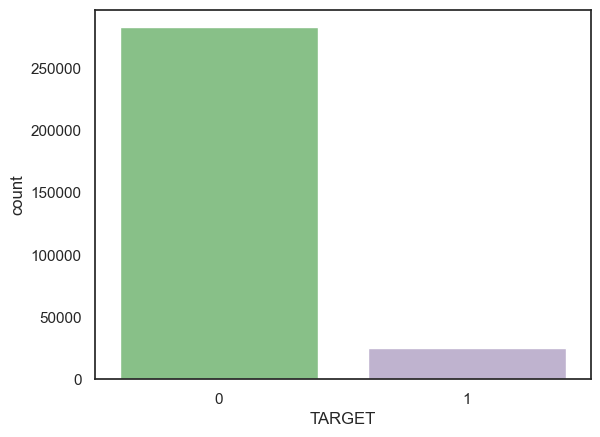

In [23]:
sns.countplot(train_data, x="TARGET", palette='Accent');
plt.show();

In [24]:
train_data.shape

(307511, 30)

In [25]:
numeric_features = train_data.select_dtypes(include='number').columns
train_data[numeric_features].describe()

TARGET   EXT_SOURCE_3  EXT_SOURCE_2   EXT_SOURCE_1  \
count  307511.000000  246546.000000  3.068510e+05  134133.000000   
mean        0.080729       0.510853  5.143927e-01       0.502130   
std         0.272419       0.194844  1.910602e-01       0.211062   
min         0.000000       0.000527  8.173617e-08       0.014568   
25%         0.000000       0.370650  3.924574e-01       0.334007   
50%         0.000000       0.535276  5.659614e-01       0.505998   
75%         0.000000       0.669057  6.636171e-01       0.675053   
max         1.000000       0.896010  8.549997e-01       0.962693   

          DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  \
count  307511.000000                307511.000000         307511.000000   
mean   -16036.995067                     2.031521              2.052463   
std      4363.988632                     0.502737              0.509034   
min    -25229.000000                     1.000000              1.000000   
25%    -19682.000000                     2.000000              2.000000   
50%    -15750.000000                     2.000000              2.000000   
75%    -12413.000000                     2.000000              2.000000   
max     -7489.000000                     3.000000              3.000000   

       DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
count           307510.000000    307511.000000           307511.000000   
mean              -962.858788     -2994.202373                0.230454   
std                826.808487      1509.450419                0.421124   
min              -4292.000000     -7197.000000                0.000000   
25%              -1570.000000     -4299.000000                0.000000   
50%               -757.000000     -3254.000000                0.000000   
75%               -274.000000     -1720.000000                0.000000   
max                  0.000000         0.000000                1.000000   

       FLAG_EMP_PHONE  DAYS_EMPLOYED  REG_CITY_NOT_LIVE_CITY  FLAG_DOCUMENT_3  \
count   307511.000000  307511.000000           307511.000000    307511.000000   
mean         0.819889   63815.045904                0.078173         0.710023   
std          0.384280  141275.766519                0.268444         0.453752   
min          0.000000  -17912.000000                0.000000         0.000000   
25%          1.000000   -2760.000000                0.000000         0.000000   
50%          1.000000   -1213.000000                0.000000         1.000000   
75%          1.000000    -289.000000                0.000000         1.000000   
max          1.000000  365243.000000                1.000000         1.000000   

       FLOORSMAX_AVG  FLOORSMAX_MEDI  FLOORSMAX_MODE  DAYS_REGISTRATION  \
count  154491.000000   154491.000000   154491.000000      307511.000000   
mean        0.226282        0.225897        0.222315       -4986.120328   
std         0.144641        0.145067        0.143709        3522.886321   
min         0.000000        0.000000        0.000000      -24672.000000   
25%         0.166700        0.166700        0.166700       -7479.500000   
50%         0.166700        0.166700        0.166700       -4504.000000   
75%         0.333300        0.333300        0.333300       -2010.000000   
max         1.000000        1.000000        1.000000           0.000000   

       AMT_GOODS_PRICE    OWN_CAR_AGE  REGION_POPULATION_RELATIVE  \
count     3.072330e+05  104582.000000               307511.000000   
mean      5.383962e+05      12.061091                    0.020868   
std       3.694465e+05      11.944812                    0.013831   
min       4.050000e+04       0.000000                    0.000290   
25%       2.385000e+05       5.000000                    0.010006   
50%       4.500000e+05       9.000000                    0.018850   
75%       6.795000e+05      15.000000                    0.028663   
max       4.050000e+06      91.000000                    0.072508   

       ELEVATORS_AVG  ELEVATOR

In [26]:
train_data.dtypes.value_counts()

float64    19
int64      11
dtype: int64

In [27]:
numeric_features = train_data.select_dtypes(include='number').columns.tolist()
categorical_features = train_data.select_dtypes(include='object').columns.tolist()

print('Count of numeric features:', len(numeric_features))
print('Count of categorical features:', len(categorical_features))
print('Total:', len(numeric_features) + len(categorical_features))

Count of numeric features: 30
Count of categorical features: 0
Total: 30


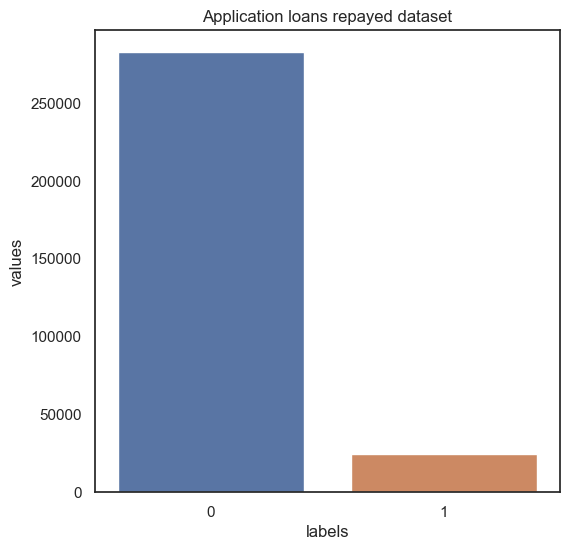

In [28]:
temp = train_data["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
plt.show()

In [29]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [30]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
       
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
      
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
  
        return mis_val_table_ren_columns

In [31]:
train_data.select_dtypes('object').isnull().sum()

Series([], dtype: float64)

In [32]:
missing_values_table(train_data).head(30)

Your selected dataframe has 30 columns.
There are 17 columns that have missing values.


Missing Values  % of Total Values
FLOORSMIN_MEDI                  208642               67.8
FLOORSMIN_MODE                  208642               67.8
FLOORSMIN_AVG                   208642               67.8
OWN_CAR_AGE                     202929               66.0
EXT_SOURCE_1                    173378               56.4
ELEVATORS_AVG                   163891               53.3
ELEVATORS_MEDI                  163891               53.3
LIVINGAREA_MEDI                 154350               50.2
LIVINGAREA_AVG                  154350               50.2
FLOORSMAX_AVG                   153020               49.8
FLOORSMAX_MEDI                  153020               49.8
FLOORSMAX_MODE                  153020               49.8
TOTALAREA_MODE                  148431               48.3
EXT_SOURCE_3                     60965               19.8
EXT_SOURCE_2                       660                0.2
AMT_GOODS_PRICE                    278                0.1
DAYS_LAST_PHONE_CHANGE               1                0.0

In [33]:
missing_values_table(train_data).head(30)

Your selected dataframe has 30 columns.
There are 17 columns that have missing values.


Missing Values  % of Total Values
FLOORSMIN_MEDI                  208642               67.8
FLOORSMIN_MODE                  208642               67.8
FLOORSMIN_AVG                   208642               67.8
OWN_CAR_AGE                     202929               66.0
EXT_SOURCE_1                    173378               56.4
ELEVATORS_AVG                   163891               53.3
ELEVATORS_MEDI                  163891               53.3
LIVINGAREA_MEDI                 154350               50.2
LIVINGAREA_AVG                  154350               50.2
FLOORSMAX_AVG                   153020               49.8
FLOORSMAX_MEDI                  153020               49.8
FLOORSMAX_MODE                  153020               49.8
TOTALAREA_MODE                  148431               48.3
EXT_SOURCE_3                     60965               19.8
EXT_SOURCE_2                       660                0.2
AMT_GOODS_PRICE                    278                0.1
DAYS_LAST_PHONE_CHANGE               1                0.0

In [34]:
#Splitting data into X and y
X = train_data.iloc[:,1:]
y= train_data['TARGET']
X = X.fillna(X.median())

In [35]:
categorical_columns = X.columns[X.dtypes == 'object']
X=pd.get_dummies(data=X,drop_first=True,columns=categorical_columns)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=24)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [38]:
def Metrics(model,X,y):
    y_prob = model.predict_proba(X)[:,1]
    y_hat = model.predict(X)
    accuracy = round(accuracy_score(y,y_hat),2)
    precision = round(precision_score(y,y_hat),2)
    recall = round(recall_score(y,y_hat),2)
    roc_auc = round(roc_auc_score(y,y_prob),2)
    roc = roc_curve(y,y_prob)

    return accuracy,precision,recall,roc_auc,roc

def Print_Metrics(model,X_train,y_train,X_test,y_test):
    accuracy_train,precision_train,recall_train,roc_auc_train,roc_train = Metrics(model,X_train,y_train)
    accuracy_test,precision_test,recall_test,roc_auc_test,roc_test = Metrics(model,X_test,y_test)
    print("Training Accuracy \n")
    print("Train Accuracy of Model is "+ str(accuracy_train))
    print("Train Precision of Model is "+ str(precision_train))
    print("Train Recall of Model is "+ str(recall_train))
    print("Train ROC AUC Score of Model is "+ str(roc_auc_train))
    print("\n \n Testing Accuracy \n ")
    print("Test Accuracy of Model is "+ str(accuracy_test))
    print("Test Precision of Model is "+ str(precision_test))
    print("Test Recall of Model is "+ str(recall_test))
    print("Test ROC AUC Score of Model is "+ str(roc_auc_test)) 

In [39]:
logistic = LogisticRegression(random_state=32,solver='liblinear')
logistic.fit(X_train,y_train)
Print_Metrics(logistic,X_train,y_train,X_test,y_test)

Training Accuracy 

Train Accuracy of Model is 0.92
Train Precision of Model is 0.43
Train Recall of Model is 0.0
Train ROC AUC Score of Model is 0.73

 
 Testing Accuracy 
 
Test Accuracy of Model is 0.92
Test Precision of Model is 0.46
Test Recall of Model is 0.0
Test ROC AUC Score of Model is 0.73


In [40]:
rforest = RandomForestClassifier()
rforest.fit(X_train,y_train)
Print_Metrics(rforest,X_train,y_train,X_test,y_test)

Training Accuracy 

Train Accuracy of Model is 1.0
Train Precision of Model is 1.0
Train Recall of Model is 1.0
Train ROC AUC Score of Model is 1.0

 
 Testing Accuracy 
 
Test Accuracy of Model is 0.92
Test Precision of Model is 0.62
Test Recall of Model is 0.01
Test ROC AUC Score of Model is 0.71


In [41]:
Feautureimportancerforrest=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(rforest.feature_importances_)],axis=1)
Feautureimportancerforrest.columns=['Variable Name','Feature Importance']
Feautureimportancerforrest['Feature Importance'] = np.round(Feautureimportancerforrest['Feature Importance'].to_numpy(),2)
Feautureimportancerforrest.sort_values(by='Feature Importance',ascending=False).head(10)

Variable Name  Feature Importance
1                 EXT_SOURCE_2                0.11
0                 EXT_SOURCE_3                0.09
3                   DAYS_BIRTH                0.08
16           DAYS_REGISTRATION                0.08
7              DAYS_ID_PUBLISH                0.08
10               DAYS_EMPLOYED                0.07
6       DAYS_LAST_PHONE_CHANGE                0.07
17             AMT_GOODS_PRICE                0.06
19  REGION_POPULATION_RELATIVE                0.06
2                 EXT_SOURCE_1                0.05

In [42]:
X=X[['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','EXT_SOURCE_1']]

In [43]:
X.shape

(307511, 10)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=24)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [45]:
logistic = LogisticRegression(random_state=32,solver='liblinear')
logistic.fit(X_train,y_train)
Print_Metrics(logistic,X_train,y_train,X_test,y_test)

Training Accuracy 

Train Accuracy of Model is 0.92
Train Precision of Model is 0.43
Train Recall of Model is 0.0
Train ROC AUC Score of Model is 0.72

 
 Testing Accuracy 
 
Test Accuracy of Model is 0.92
Test Precision of Model is 0.44
Test Recall of Model is 0.0
Test ROC AUC Score of Model is 0.72


In [46]:
rforest = RandomForestClassifier()
rforest.fit(X_train,y_train)
Print_Metrics(rforest,X_train,y_train,X_test,y_test)

Training Accuracy 

Train Accuracy of Model is 1.0
Train Precision of Model is 1.0
Train Recall of Model is 1.0
Train ROC AUC Score of Model is 1.0

 
 Testing Accuracy 
 
Test Accuracy of Model is 0.92
Test Precision of Model is 0.44
Test Recall of Model is 0.01
Test ROC AUC Score of Model is 0.71


In [47]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
Print_Metrics(adaboost,X_train,y_train,X_test,y_test)

Training Accuracy 

Train Accuracy of Model is 0.92
Train Precision of Model is 0.49
Train Recall of Model is 0.01
Train ROC AUC Score of Model is 0.74

 
 Testing Accuracy 
 
Test Accuracy of Model is 0.92
Test Precision of Model is 0.59
Test Recall of Model is 0.02
Test ROC AUC Score of Model is 0.73


In [48]:
decisiontree= DecisionTreeClassifier(random_state=11,max_depth=15)
decisiontree.fit(X_train,y_train)
Print_Metrics(decisiontree,X_train,y_train,X_test,y_test)

Training Accuracy 

Train Accuracy of Model is 0.93
Train Precision of Model is 0.89
Train Recall of Model is 0.2
Train ROC AUC Score of Model is 0.81

 
 Testing Accuracy 
 
Test Accuracy of Model is 0.91
Test Precision of Model is 0.22
Test Recall of Model is 0.05
Test ROC AUC Score of Model is 0.65


In [49]:
search_space_DT= {
               'max_depth':[5,10,11,12,13,14,15,20],
               'min_samples_leaf':[5,10,50,100,500,5000]
               }

cl_DT=RandomizedSearchCV(estimator=decisiontree,param_distributions=search_space_DT,scoring='roc_auc',random_state=1,n_iter=15)
cl_DT.fit(X_train,y_train)

Print_Metrics(cl_DT.best_estimator_,X_train,y_train,X_test,y_test)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy 

Train Accuracy of Model is 0.92
Train Precision of Model is 0.0
Train Recall of Model is 0.0
Train ROC AUC Score of Model is 0.75

 
 Testing Accuracy 
 
Test Accuracy of Model is 0.92
Test Precision of Model is 0.0
Test Recall of Model is 0.0
Test ROC AUC Score of Model is 0.71


C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
